In [2]:
import os
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
#Sklearn imports(and othrs)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.datasets import make_classification 
from datetime import datetime

In [11]:
filepath_met = "./data/linearmodel.parquet"

# read the Parquet file into a pandas dataframe
df = pq.read_pandas(filepath_met).to_pandas()
df['People per Sq Km'] = df['People per Sq Km'].str.replace(',', '').astype(float)

df=df.loc[:, 'Mid-2020 population':'Woodhouse']
y = df['Crime ID_y']
#X = df.drop(['Crime ID_y','Mid-2020 population','Area Sq Km','1Months','3Months','12Months','4Months','2MonthsLag','3MonthsLag'], axis=1)
X=df.drop(['Crime ID_y','Mid-2020 population','Area Sq Km'],axis=1)


X

,People per Sq Km,1Months,2Months,3Months,4Months,12Months,1MonthsLag,2MonthsLag,3MonthsLag,4MonthsLag,...,Golders Green,Hendon,High Barnet,Mill Hill,Totteridge & Woodside,Underhill,West Finchley,West Hendon,Whetstone,Woodhouse
0,6525.0,2.0,10.0,16.0,29.0,107.0,8.0,19.0,27.0,40.0,...,0,0,1,0,0,0,0,0,0,0
1,6525.0,2.0,10.0,16.0,29.0,107.0,8.0,19.0,27.0,40.0,...,0,0,1,0,0,0,0,0,0,0
2,6525.0,3.0,9.0,11.0,19.0,94.0,6.0,10.0,27.0,33.0,...,0,0,1,0,0,0,0,0,0,0
3,6525.0,5.0,18.0,27.0,39.0,95.0,13.0,21.0,30.0,27.0,...,0,0,1,0,0,0,0,0,0,0
4,6525.0,5.0,18.0,27.0,39.0,95.0,13.0,21.0,30.0,27.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42506,6462.0,11.0,16.0,21.0,26.0,135.0,5.0,10.0,19.0,43.0,...,0,0,0,0,0,1,0,0,0,0
42507,6462.0,6.0,17.0,22.0,27.0,122.0,11.0,10.0,18.0,30.0,...,0,0,0,0,0,1,0,0,0,0
42508,6462.0,12.0,18.0,29.0,34.0,119.0,6.0,16.0,15.0,24.0,...,0,0,0,0,0,1,0,0,0,0
42509,6462.0,12.0,18.0,29.0,34.0,119.0,6.0,16.0,15.0,24.0,...,0,0,0,0,0,1,0,0,0,0


In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=42, shuffle=True)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# calculate R-squared for the predictions
r2 = r2_score(y_test, y_pred)
print("R-squared: ", r2)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)


R-squared:  0.5469796398223434
Mean squared error:  31.778919517066356


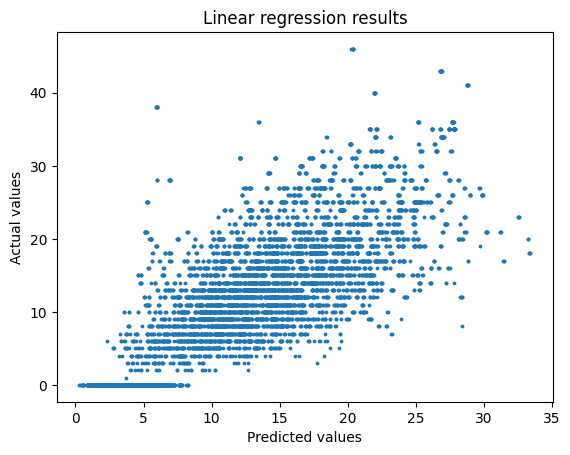

In [13]:
plt.scatter(y_pred, y_test,s=3)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Linear regression results")
plt.show()

In [14]:
y_pred[:20],y_test[:20]

C:\Users\20211445\AppData\Local\Temp\ipykernel_21688\3117589980.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_pred[:20],y_test[:20]


(array([ 1.41569749,  8.55807074, 29.72259421, 21.9788041 , 17.76039908,
        19.29873637, 12.07923098, 15.35294908, 21.66026285, 18.12257825,
        10.8380726 , 17.60332589,  9.62781053, 13.28638167,  6.14436906,
         3.27826351, 21.54162588, 15.27282241, 13.69113605, 18.11680194]),
 9523      0
 20442     6
 25094    19
 11180    17
 29914    27
 39898    21
 3265      4
 33524    20
 28239    22
 12573    18
 33601    16
 3426     15
 22827     6
 9426     15
 26948     0
 25678     0
 962      27
 34963    13
 3141     24
 13144    15
 Name: Crime ID_y, dtype: int64)

In [15]:
df_predictors = df[['Crime ID_y','People per Sq Km','2Months','4MonthsLag','Year']]
#"2Months"
#"4Months"
# compute the correlation matrix
corr_matrix = df_predictors.corr()
print(corr_matrix)

                  Crime ID_y  People per Sq Km   2Months  4MonthsLag      Year
Crime ID_y          1.000000          0.099544  0.686591    0.540897  0.027639
People per Sq Km    0.099544          1.000000  0.109203    0.117055  0.027807
2Months             0.686591          0.109203  1.000000    0.642225  0.071164
4MonthsLag          0.540897          0.117055  0.642225    1.000000  0.186536
Year                0.027639          0.027807  0.071164    0.186536  1.000000
